# Analise de resultados de MDC

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import math



In [2]:
  
# Opening JSON file
f = open('../test\MerkleTree\MerkleTree_results.json')
  
# returns JSON object as 
# a dictionary
data = json.load(f)
df = pd.DataFrame(data)
df

,N,SolucionaGasInicial,SolucionaGasExecucao,SolucionaGasTotal,VerificaGasInicial,VerificaGasExecucao,VerificaGasTotal,RazaoSolucionaVerifica
0,1,2141,374,2515,2739,1053,3792,0.663238
1,2,2141,374,2515,4979,1488,6467,0.388897
2,2,2141,374,2515,4979,1478,6457,0.389500
3,4,2141,374,2515,7155,1923,9078,0.277043
4,4,2141,374,2515,7155,1913,9068,0.277349
...,...,...,...,...,...,...,...,...
2042,1024,2141,374,2515,24435,5343,29778,0.084458
2043,1024,2141,374,2515,24435,5373,29808,0.084373
2044,1024,2141,374,2515,24435,5363,29798,0.084402
2045,1024,2141,374,2515,24435,5353,29788,0.084430


In [3]:
# Opening JSON file
f_insere = open('../test\MerkleTree\MerkleTree_results_insere.json')
  
# returns JSON object as 
# a dictionary
data_insere = json.load(f_insere)
df_insere = pd.DataFrame(data_insere)
df_insere

,N,InsereParaSolucionaGasInicial,InsereParaSolucionaGasExecucao,InsereParaSolucionaGasTotal,InsereParaVerificaGasInicial,InsereParaVerificaGasExecucao,InsereParaVerificaGasTotal,RazaoSolucionaVerifica
0,1,2497,20988,23485,2835,20323,23158,1.014120
1,2,3905,41622,45527,2771,20323,23094,1.971378
2,4,6785,82890,89675,2835,20323,23158,3.872312
3,8,12353,165426,177779,2835,20323,23158,7.676786
4,16,23553,330498,354051,2835,20323,23158,15.288496
5,32,46081,660642,706723,2835,20323,23158,30.517445
6,64,91009,1320930,1411939,2835,20323,23158,60.969816
7,128,180737,2641506,2822243,2835,20323,23158,121.869030
8,256,360577,5282658,5643235,2835,20323,23158,243.684040
9,512,719745,10564962,11284707,2835,20323,23158,487.291951


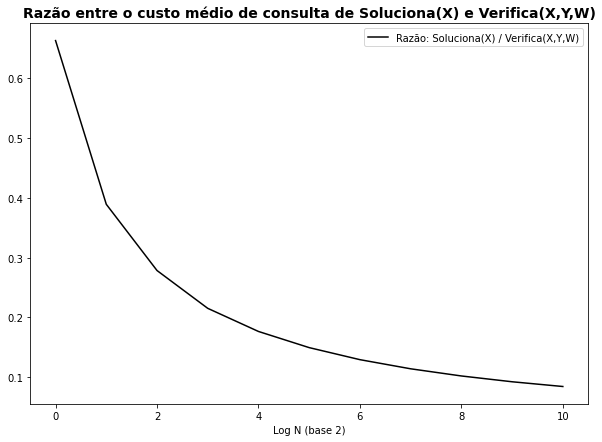

In [8]:
df_calculate = df[['N', 'RazaoSolucionaVerifica', 'SolucionaGasTotal', 'VerificaGasTotal']]
df_calculate_grouped = df_calculate.groupby(['N']).mean()

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

func = lambda x: int(math.log(x, 2))

plt.plot([func(item) for item in list(df_calculate_grouped.index.values)], df_calculate_grouped['RazaoSolucionaVerifica'],c='black', label='Razão: Soluciona(X) / Verifica(X,Y,W)')
plt.legend()
plt.title("Razão entre o custo médio de consulta de Soluciona(X) e Verifica(X,Y,W)", {'fontsize': 14, 'fontweight' : 600})
plt.xlabel("Log N (base 2)")

plt.show()

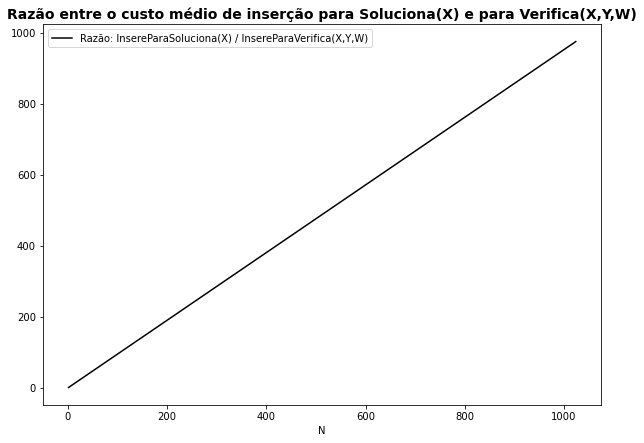

In [5]:
df_calculate_insere = df_insere[['N', 'RazaoSolucionaVerifica', 'InsereParaSolucionaGasTotal', 'InsereParaVerificaGasTotal']]
df_calculate_grouped_insere = df_calculate_insere.groupby(['N']).mean()

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

func = lambda x: int(math.log(x, 2))

plt.plot([item for item in list(df_calculate_grouped_insere.index.values)], df_calculate_grouped_insere['RazaoSolucionaVerifica'],c='black', label='Razão: InsereParaSoluciona(X) / InsereParaVerifica(X,Y,W)')
plt.legend()
plt.title("Razão entre o custo médio de inserção para Soluciona(X) e para Verifica(X,Y,W)", {'fontsize': 14, 'fontweight' : 600})
plt.xlabel("N")

plt.show()


In [6]:
df_calculate_grouped_insere['InsereParaSolucionaGasTotalPorItem'] = df_calculate_grouped_insere.apply(lambda row: row['InsereParaSolucionaGasTotal']/row.name, axis=1)
df_calculate_grouped_insere['InsereParaVerificaGasTotalPorItem'] = df_calculate_grouped_insere.apply(lambda row: row['InsereParaVerificaGasTotal']/row.name, axis=1)

df_calculate_grouped_insere

,RazaoSolucionaVerifica,InsereParaSolucionaGasTotal,InsereParaVerificaGasTotal,InsereParaSolucionaGasTotalPorItem,InsereParaVerificaGasTotalPorItem
N,,,,,
1,1.014120,23485,23158,23485.000000,23158.000000
2,1.971378,45527,23094,22763.500000,11547.000000
4,3.872312,89675,23158,22418.750000,5789.500000
8,7.676786,177779,23158,22222.375000,2894.750000
16,15.288496,354051,23158,22128.187500,1447.375000
32,30.517445,706723,23158,22085.093750,723.687500
64,60.969816,1411939,23158,22061.546875,361.843750
128,121.869030,2822243,23158,22048.773438,180.921875
256,243.684040,5643235,23158,22043.886719,90.460938


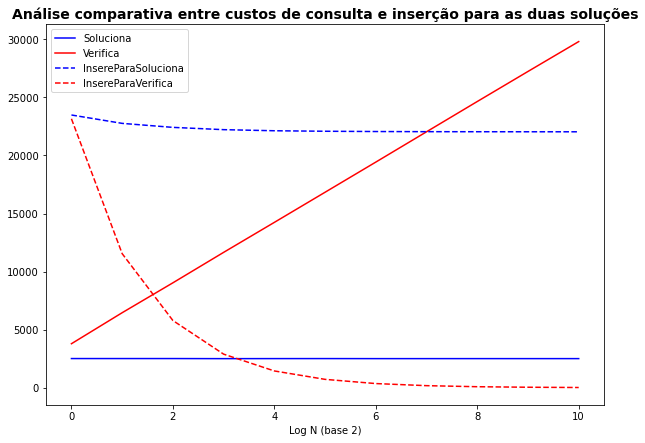

In [7]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

func = lambda x: int(math.log(x, 2))

plt.plot([func(item) for item in list(df_calculate_grouped_insere.index.values)], df_calculate_grouped['SolucionaGasTotal'],c='blue', label='Soluciona')
plt.plot([func(item) for item in list(df_calculate_grouped_insere.index.values)], df_calculate_grouped['VerificaGasTotal'],c='red', label='Verifica')

plt.plot([func(item) for item in list(df_calculate_grouped_insere.index.values)], df_calculate_grouped_insere['InsereParaSolucionaGasTotalPorItem'],c='blue', label='InsereParaSoluciona', linestyle="--")
plt.plot([func(item) for item in list(df_calculate_grouped_insere.index.values)], df_calculate_grouped_insere['InsereParaVerificaGasTotalPorItem'],c='red', label='InsereParaVerifica', linestyle="--")


plt.legend()
plt.title("Análise comparativa entre custos de consulta e inserção para as duas soluções", {'fontsize': 14, 'fontweight' : 600})
plt.xlabel("Log N (base 2)")

plt.show()

In [43]:
df_calculate_grouped_insere

,RazaoSolucionaVerifica,InsereParaSolucionaGasTotal,InsereParaVerificaGasTotal
N,,,
1,1.014120,23485,23158
2,1.971378,45527,23094
4,3.872312,89675,23158
8,7.676786,177779,23158
16,15.288496,354051,23158
32,30.517445,706723,23158
64,60.969816,1411939,23158
128,121.869030,2822243,23158
256,243.684040,5643235,23158


N
1       23485.000000
2       22763.500000
4       22418.750000
8       22222.375000
16      22128.187500
32      22085.093750
64      22061.546875
128     22048.773438
256     22043.886719
512     22040.443359
1024    22038.284180
dtype: float64